## **NGUEPONWOUO Joseph-Marie**

## **Pricing Options Using Machine Learning**

# **1. Pricing Options Using Machine Learning Algorithms**

# **1.1. Abstract**

In the intricate world of quantitative finance, the potential of machine learning to predict financial instruments' prices is increasingly evident. This research evaluates various machine learning models in forecasting vanilla put option prices. By generating a dataset rooted in the Black-Scholes model, the Neural Network model displayed outstanding out-of-sample performance closely trailed by tree-based models.

# **1.2 Introduction**

Options, pivotal in financial markets, serve in risk mitigation,, hedging, and speculative strategies. Traditional models, such as Black-Scholes, have been foundational in option pricing. Yet, market evolution challenges the assumptions of these conventional models, ushering (conduisant) in potential pricing discrepancies. The advent of machine learning offers a potential avenue to apply these advanced algorithms in option pricing, potentially surpassing classical model limitations.


# **1.3 Methodology**

The approach for this study is outlined in the following steps

1.3.1 Data Generation

Emulating real-world scenarios, 100,000 option samples were synthsized, embedding parameters to mirror genuine market characteristics. A pronounced volatility skew, commonly observed for out-of-the-money options was seamlessly incorporated.

In [3]:
import numpy as np
import pandas as pd

# Set random seed for reproductibility
np.random.seed(42)

# Number of samples
n_samples = 100000

#Generating random parameters for the options
S = np.random.uniform(50, 150, n_samples) # Spot Price
K = np.random.uniform(50, 150, n_samples) # Strike Price
T = np.random.uniform(0.25, 2, n_samples) # Time to maturity: Between 3 months and 2 years
r = np.random.uniform(0.01, 0.05, n_samples) # Risk-free rate: Between 1% and 5%

#Introducing volatility skew: Options with lower strike prices tend to have higher volatilities
sigma = np.random.uniform(0.1, 0.4, n_samples) + (K<S)*np.random.uniform(0.05, 0.15, n_samples)

#Creating a DataFrame to store these values
options_df = pd.DataFrame({
    'Spot_Price': S,
    'Strike_Price': K,
    'Time_to_Maturity': T,
    'Risk_free_Rate': r,
    'Volatility': sigma
})

options_df.head()

,Spot_Price,Strike_Price,Time_to_Maturity,Risk_free_Rate,Volatility
0,87.454012,108.077904,0.744529,0.016282,0.366686
1,145.071431,102.697165,1.052684,0.013820,0.295664
2,123.199394,85.103695,0.423627,0.015518,0.229967
3,109.865848,99.321266,1.031965,0.028940,0.525141
4,65.601864,86.509664,0.605392,0.045381,0.230878


# **1.3.2 Option Pricing**

Next, we'll use the Black-Scholes formula to compute the put option prices for each of these paramter sets.

In [6]:
from scipy.stats import norm

def black_scholes_put_price(S, K, T, r, sigma, q=0):
  """
  Compute the Black-Scholes put option price.

  Parameters:
  - S: Spot price of the underlying asset
  - K: Strike price of the option
  - T: Time to maturity (in years)
  - r: risk-free interest rate (annualized)
  - sigma: Volatility of the underlying asset (annualized)
  - q: Dividend yield (annualized). Default is 0 (no dividends).

  Returns:
  - Put option price
  """

  d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 -sigma * np.sqrt(T)

  put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

  return put_price

#Compute put_option prices using the Black-Scholes formula
options_df['BS_Put_Price'] = black_scholes_put_price(
    options_df['Spot_Price'],
    options_df['Strike_Price'],
    options_df['Time_to_Maturity'],
    options_df['Risk_free_Rate'],
    options_df['Volatility']
)

options_df[['Spot_Price', 'Strike_Price', 'Volatility', 'BS_Put_Price']].head(10)

,Spot_Price,Strike_Price,Volatility,BS_Put_Price
0,87.454012,108.077904,0.366686,24.191026
1,145.071431,102.697165,0.295664,2.102809
2,123.199394,85.103695,0.229967,0.029113
3,109.865848,99.321266,0.525141,15.590019
4,65.601864,86.509664,0.230878,19.065520
5,65.599452,115.793134,0.135047,48.303465
6,55.808361,133.502965,0.207764,73.740005
7,136.617615,128.689444,0.415175,23.849926
8,110.111501,84.069242,0.341189,4.172763
9,120.807258,100.941949,0.462094,3.456679


# **1.3.3 Volatility Skew Adjustment**

The volatiliy skew is a phenomenon where out-of-the-money (OTM) options tend to have higher implied volatilities compared to at-the-money (ATM) or in-the-money (ITM) options. This skew is often more pronounced for options with lower strike prices.
To implement a more pronounced skew, I'll adjust the volatility based on:

1. How far OTM the option is
2. The magnitude of the strike price

In [8]:
#Adjusting the volatility skew based on how far OTM the option is and the magnitude of the strike price
delta_from_ATM = (options_df['Spot_Price'] - options_df['Strike_Price']).abs()
skew_factor = np.where(options_df['Strike_Price'] < options_df['Spot_Price'], delta_from_ATM / options_df['Strike_Price'], 0)

#Adjusting the volatility to introduce a more pronounced skew for OTM options and options with smaller strike prices
options_df['Adjusted_Volatility'] = options_df['Volatility'] + skew_factor * np.random.uniform(0.05, 0.2, n_samples)

#Compute put option prices using Black-Scholes formula with adjusted volatility
options_df['Adjusted_BS_Put_Price'] = black_scholes_put_price(
    options_df['Spot_Price'],
    options_df['Strike_Price'],
    options_df['Time_to_Maturity'],
    options_df['Risk_free_Rate'],
    options_df['Adjusted_Volatility']
)

options_df[['Spot_Price', 'Strike_Price', 'Volatility', 'BS_Put_Price', 'Adjusted_BS_Put_Price']].head(10)

,Spot_Price,Strike_Price,Volatility,BS_Put_Price,Adjusted_BS_Put_Price
0,87.454012,108.077904,0.366686,24.191026,24.191026
1,145.071431,102.697165,0.295664,2.102809,4.183218
2,123.199394,85.103695,0.229967,0.029113,0.067591
3,109.865848,99.321266,0.525141,15.590019,16.396201
4,65.601864,86.509664,0.230878,19.065520,19.065520
5,65.599452,115.793134,0.135047,48.303465,48.303465
6,55.808361,133.502965,0.207764,73.740005,73.740005
7,136.617615,128.689444,0.415175,23.849926,24.642357
8,110.111501,84.069242,0.341189,4.172763,5.884134
9,120.807258,100.941949,0.462094,3.456679,3.806912


# **1.3.4 Data Splitting**

We'll split the generated data into training and testing sets. This ensures that the machine learning models are evaluated on unseen data, providing a more realistic assessment of their predictive capabilities.

In [9]:
from sklearn.model_selection import train_test_split

X = options_df[['Spot_Price', 'Strike_Price', 'Time_to_Maturity', 'Risk_free_Rate', 'Volatility']]
y = options_df['Adjusted_BS_Put_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((80000, 5), (20000, 5))

# **1.4 Machine Learning Models**

## **1.4.1 Linear Regression Model**

We'll begin by training and evaluating a Linear Regression model on our dataset. This model will serve as a baseline, and its performance metrics will be used for comparison with more complex models.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

lr_mse, lr_mae, lr_r2

(82.1409113955229, 7.405355439800699, 0.8024992321507589)

## **1.4.2 Decision Tree Regressor**

Next, we'll explore a Decision Tree Regressor. Decision Trees can capture non-linear relationships in the data and might offer better performance than linear model. Let's train, predict, and evaluate the model.

In [11]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

dt_mse, dt_mae, dt_r2

(2.2171334402518106, 1.1011792345763927, 0.9946690930325149)

## **1.4.3 Random Forest Regressor**

We'll now utilise the Random Forest Regressor. Random Forests, being an ensemble of decision trees, can often capture more intricate patterns in the data, providing potentially better predictive power than individual trees. Let's proceed with its training, prediction and evaluation.

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

rf_mse, rf_mae, rf_r2

(0.8335658585106492, 0.6765749874344176, 0.9979957624731476)

## **1.4.4 Gradient Boosted Trees Regressor**

We'll now implement the Gradient Boosted Trees Regressor. Gradient Boosting is a powerful ensemble technique that can provide high accuracy by iteratively correcting errors from the previous trees.

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

gb_mse, gb_mae, gb_r2

(2.955756439911589, 1.352568017804242, 0.9928931374568398)

## **1.4.5 Neural Network (MLP) Regressor**

Lastly, we'll employ a neural network model. Networks can capture complex non-linear relationships in data and are particularly suited for large datasets. Before training, we'll scale our features since neural networks perform better with standardized input data.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)

nn_model.fit(X_train_scaled, y_train)

nn_predictions = nn_model.predict(X_test_scaled)

nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

nn_mse, nn_mae, nn_r2

(0.11377144493707893, 0.19625781435130946, 0.9997264463304261)

## **1.5 Summary of Model Performance**

The table below provides a concise summary of each model's performance on the test data. These metrics allow us to compare and assess the efficiency of each model in predicting vanilla put option prices.

In [16]:
results_df = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosted Trees', 'Neural Network (MLP)'],
    'Mean Squared Error': [lr_mse, dt_mse, rf_mse, gb_mse, nn_mse],
    'Mean Absolute Error': [lr_mae, dt_mae, rf_mae, gb_mae, nn_mae],
    'R-squared': [lr_r2, dt_r2, rf_r2, gb_r2, nn_r2]

})

results_df

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,82.140911,7.405355,0.802499
1,Decision Tree,2.217133,1.101179,0.994669
2,Random Forest,0.833566,0.676575,0.997996
3,Gradient Boosted Trees,2.955756,1.352568,0.992893
4,Neural Network (MLP),0.113771,0.196258,0.999726


## **1.5.1 Scatter Plots of Actual vs. Predicted Option Prices**

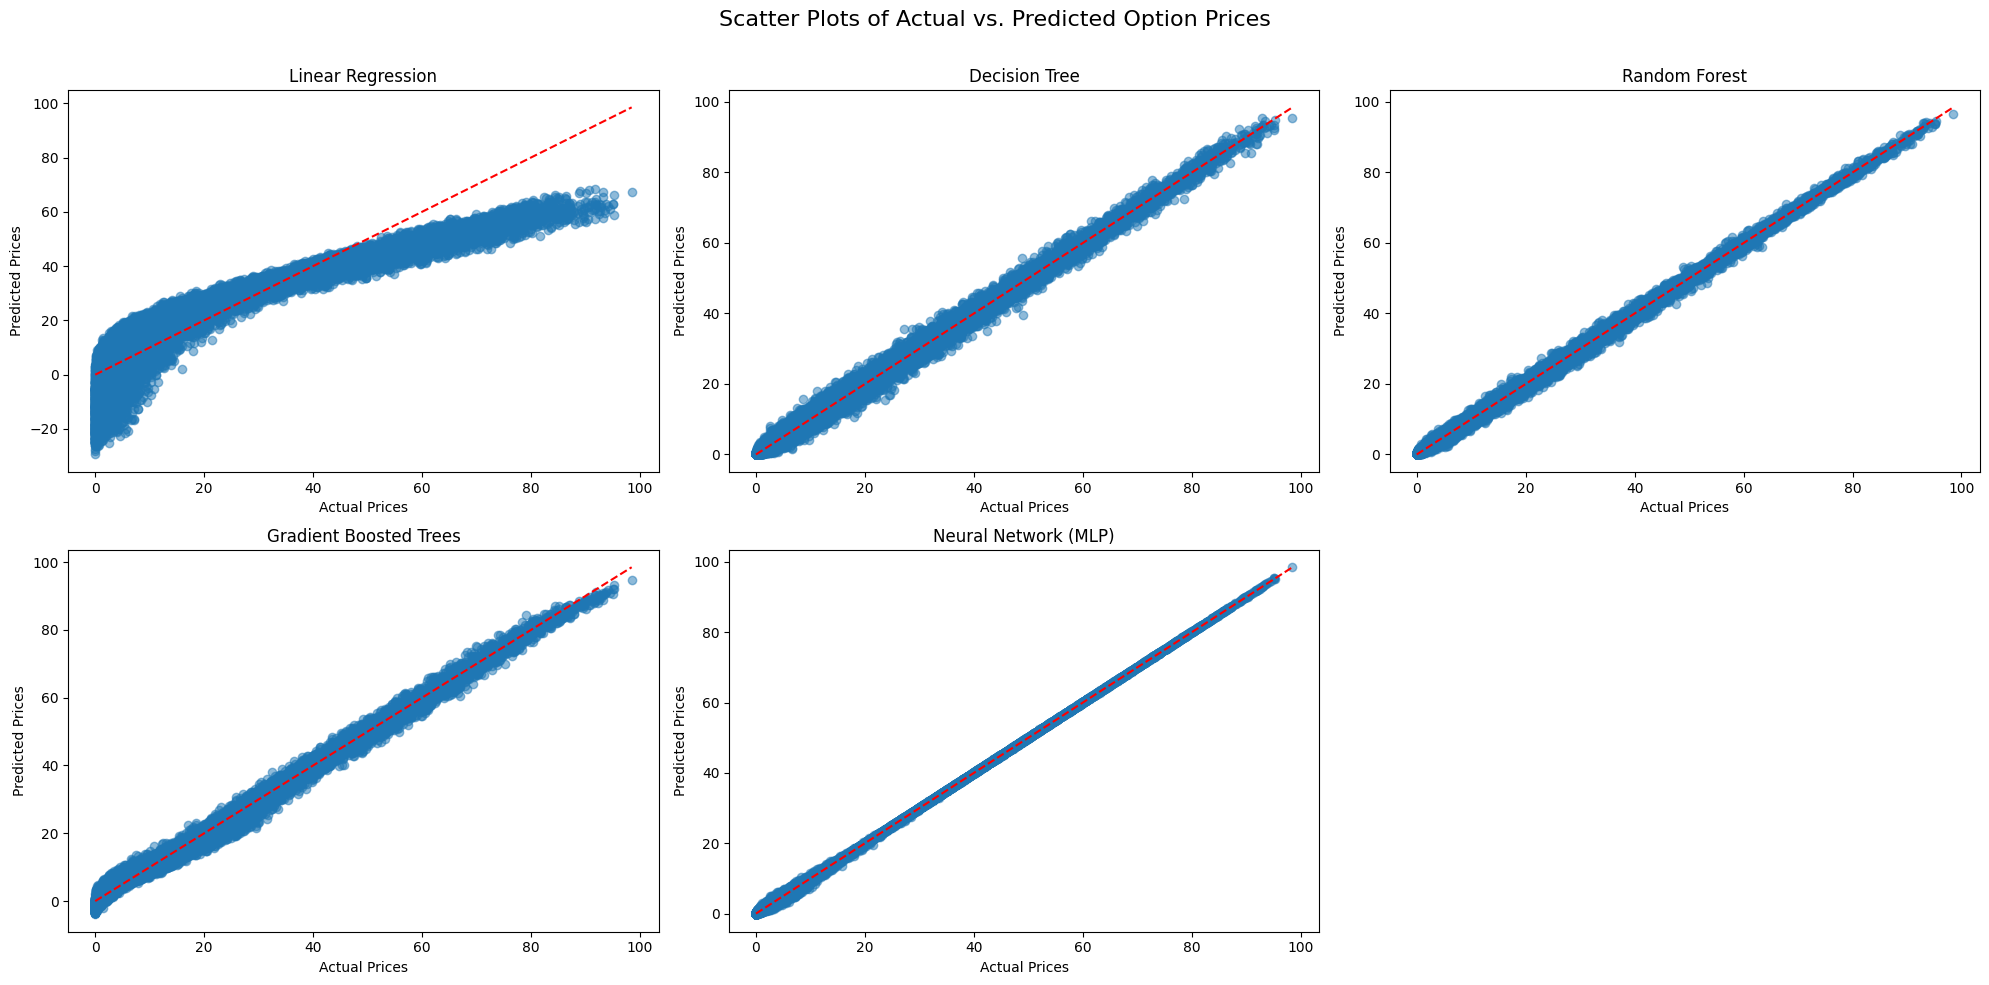

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Scatter Plots of Actual vs. Predicted Option Prices', fontsize=16)

axs[0,0].scatter(y_test, lr_predictions, alpha=0.5)
axs[0,0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
axs[0,0].set_title('Linear Regression')
axs[0,0].set_xlabel('Actual Prices')
axs[0,0].set_ylabel('Predicted Prices')

axs[0,1].scatter(y_test, dt_predictions, alpha=0.5)
axs[0,1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
axs[0,1].set_title('Decision Tree')
axs[0,1].set_xlabel('Actual Prices')
axs[0,1].set_ylabel('Predicted Prices')

axs[0,2].scatter(y_test, rf_predictions, alpha=0.5)
axs[0,2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
axs[0,2].set_title('Random Forest')
axs[0,2].set_xlabel('Actual Prices')
axs[0,2].set_ylabel('Predicted Prices')

axs[1,0].scatter(y_test, gb_predictions, alpha=0.5)
axs[1,0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
axs[1,0].set_title('Gradient Boosted Trees')
axs[1,0].set_xlabel('Actual Prices')
axs[1,0].set_ylabel('Predicted Prices')

axs[1,1].scatter(y_test, nn_predictions, alpha=0.5)
axs[1,1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
axs[1,1].set_title('Neural Network (MLP)')
axs[1,1].set_xlabel('Actual Prices')
axs[1,1].set_ylabel('Predicted Prices')

axs[1,2].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## **1.6 Conclusion**

This research underscores the potential of machine learning models, especially deep learning, in the realm of option pricing. Their ability to model intricate relationships and adapt to complex data structures makes them compelling candidates for financial modeling. However, while these models show promise, practitioners must exercise caution. Thorough validation on real-world data and a comprehensive understanding of model intricacies and limitations are imperative before deploying them in live financial scenarios.